In [1]:
# load python packages
import numpy as np
import pandas as pd

# load machine learning packages
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import scale

# load PCA package
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [2]:

options = {
    "categorical_wind_direction": True,
    "categorical_precip": True
}
"""--------------------------------------------------------------------
DATA PROCESSING
--------------------------------------------------------------------"""
path='./'
dust_df = pd.read_csv(path+'saharan_dust_met_vars.csv', index_col='time')

if(options["categorical_wind_direction"]):
    def cat_wind_dir(row):
        if((row['U10']>=0) and (row['V10']>=0)):
            return 'SW'
        if((row['U10']>=0) and (row['V10']<0)):
            return 'NW'
        if((row['U10']<0) and (row['V10']>=0)):
            return 'SE'
        else:
            return 'NE'
    dust_df['WIND_DIR'] = dust_df.apply(cat_wind_dir, axis=1)
    dust_df = dust_df.drop(columns=['U10','V10'])
# 0 -> no rain "NR"
# [0,24] mm -> drizzle "D"
# (24,60] mm -> light rain "LR"
# (60,182] mm -> moderate rain "MR"
# (82,infinity) mm -> heavy rain "HR"
if(options["categorical_precip"]):
    def cat_precip(row):
        if(row['RAINC'] == 0):
            return 'NR'
        elif((row['RAINC'] > 0) and (row['RAINC'] <= 24)):
            return 'D'
        elif((row['RAINC'] > 24) and (row['RAINC'] <= 60)):
            return 'LR'
        elif((row['RAINC'] > 60) and (row['RAINC'] <= 182)):
            return 'MR'
        elif(row['RAINC'] > 82):
            return 'HR'
    dust_df['RAIN'] = dust_df.apply(cat_precip, axis=1)
    dust_df = dust_df.drop(columns=["RAINC"])


In [3]:
dust_df

,PM10,T2,rh2,slp,PBLH,wind_speed_10m,wind_speed_925hPa,WIND_DIR,RAIN
time,,,,,,,,,
1960-01-01,2000.1490,288.24875,32.923786,1018.89420,484.91812,6.801503,13.483623,NE,NR
1960-01-02,4686.5370,288.88450,30.528862,1017.26575,601.58310,8.316340,18.027075,NE,NR
1960-01-03,5847.7515,290.97128,26.504536,1015.83514,582.38540,9.148216,17.995173,NE,NR
1960-01-04,5252.0586,292.20060,30.678936,1013.92230,555.11860,8.751743,15.806478,NE,NR
1960-01-05,3379.3190,293.06076,27.790462,1011.94934,394.95440,6.393228,9.160809,NE,NR
...,...,...,...,...,...,...,...,...,...
2010-12-27,2681.4685,292.38474,18.858383,1011.69574,315.81320,4.749993,7.846004,NE,HR
2010-12-28,1345.8488,291.46680,26.357006,1010.66340,232.03355,3.051484,3.346668,NE,HR
2010-12-29,4500.9810,289.62990,23.169529,1014.53740,557.29913,6.249619,13.007574,NE,HR


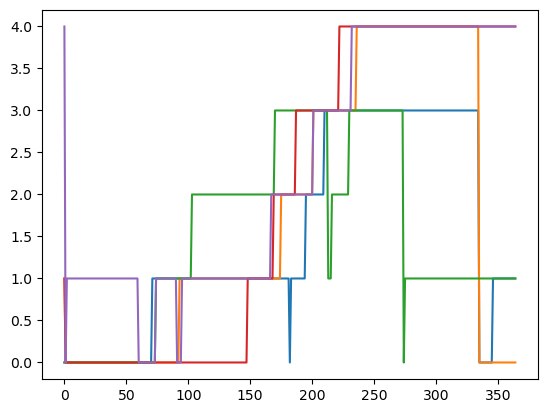

In [4]:
for i in range(5):
    rain_num = []
    for row in dust_df[i*365:(i+1)*365].values:
        if(row[-1] == "NR"):
            rain_num.append(0)
        elif(row[-1] == "D"):
            rain_num.append(1)
        elif(row[-1] == "LR"):
            rain_num.append(2)
        elif(row[-1] == "MR"):
            rain_num.append(3)
        elif(row[-1] == "HR"):
            rain_num.append(4)
        else:
            print("AAAAAAAAAAAAAAAAA")
    plt.plot(rain_num)
plt.show()

In [5]:
#df = dust_df.drop(labels='WIND_DIR', axis = 1)

In [6]:
dust_df

,PM10,T2,rh2,slp,PBLH,wind_speed_10m,wind_speed_925hPa,WIND_DIR,RAIN
time,,,,,,,,,
1960-01-01,2000.1490,288.24875,32.923786,1018.89420,484.91812,6.801503,13.483623,NE,NR
1960-01-02,4686.5370,288.88450,30.528862,1017.26575,601.58310,8.316340,18.027075,NE,NR
1960-01-03,5847.7515,290.97128,26.504536,1015.83514,582.38540,9.148216,17.995173,NE,NR
1960-01-04,5252.0586,292.20060,30.678936,1013.92230,555.11860,8.751743,15.806478,NE,NR
1960-01-05,3379.3190,293.06076,27.790462,1011.94934,394.95440,6.393228,9.160809,NE,NR
...,...,...,...,...,...,...,...,...,...
2010-12-27,2681.4685,292.38474,18.858383,1011.69574,315.81320,4.749993,7.846004,NE,HR
2010-12-28,1345.8488,291.46680,26.357006,1010.66340,232.03355,3.051484,3.346668,NE,HR
2010-12-29,4500.9810,289.62990,23.169529,1014.53740,557.29913,6.249619,13.007574,NE,HR


In [7]:
# # converting type of columns to 'category'
# df['RAIN'] = df['RAIN'].astype('category')
# # Assigning numerical values and storing in another column
# df['RAIN_Cat'] = df['RAIN'].cat.codes

In [8]:
dust_df['RAIN'].unique()

array(['NR', 'D', 'LR', 'MR', 'HR'], dtype=object)

In [9]:
mapping = {
    "NR": 1,
    "D": 2,
    "LR": 3,
    "MR": 4,
    "HR": 5
}
dust_df["RAIN_CAT"] = dust_df["RAIN"].replace(mapping)
dust_df

/tmp/ipykernel_2677/1635264325.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dust_df["RAIN_CAT"] = dust_df["RAIN"].replace(mapping)


,PM10,T2,rh2,slp,PBLH,wind_speed_10m,wind_speed_925hPa,WIND_DIR,RAIN,RAIN_CAT
time,,,,,,,,,,
1960-01-01,2000.1490,288.24875,32.923786,1018.89420,484.91812,6.801503,13.483623,NE,NR,1
1960-01-02,4686.5370,288.88450,30.528862,1017.26575,601.58310,8.316340,18.027075,NE,NR,1
1960-01-03,5847.7515,290.97128,26.504536,1015.83514,582.38540,9.148216,17.995173,NE,NR,1
1960-01-04,5252.0586,292.20060,30.678936,1013.92230,555.11860,8.751743,15.806478,NE,NR,1
1960-01-05,3379.3190,293.06076,27.790462,1011.94934,394.95440,6.393228,9.160809,NE,NR,1
...,...,...,...,...,...,...,...,...,...,...
2010-12-27,2681.4685,292.38474,18.858383,1011.69574,315.81320,4.749993,7.846004,NE,HR,5
2010-12-28,1345.8488,291.46680,26.357006,1010.66340,232.03355,3.051484,3.346668,NE,HR,5
2010-12-29,4500.9810,289.62990,23.169529,1014.53740,557.29913,6.249619,13.007574,NE,HR,5


In [10]:
df_new=dust_df.drop(labels='RAIN', axis = 1)

In [11]:
df_new

,PM10,T2,rh2,slp,PBLH,wind_speed_10m,wind_speed_925hPa,WIND_DIR,RAIN_CAT
time,,,,,,,,,
1960-01-01,2000.1490,288.24875,32.923786,1018.89420,484.91812,6.801503,13.483623,NE,1
1960-01-02,4686.5370,288.88450,30.528862,1017.26575,601.58310,8.316340,18.027075,NE,1
1960-01-03,5847.7515,290.97128,26.504536,1015.83514,582.38540,9.148216,17.995173,NE,1
1960-01-04,5252.0586,292.20060,30.678936,1013.92230,555.11860,8.751743,15.806478,NE,1
1960-01-05,3379.3190,293.06076,27.790462,1011.94934,394.95440,6.393228,9.160809,NE,1
...,...,...,...,...,...,...,...,...,...
2010-12-27,2681.4685,292.38474,18.858383,1011.69574,315.81320,4.749993,7.846004,NE,5
2010-12-28,1345.8488,291.46680,26.357006,1010.66340,232.03355,3.051484,3.346668,NE,5
2010-12-29,4500.9810,289.62990,23.169529,1014.53740,557.29913,6.249619,13.007574,NE,5


In [12]:
df_new['WIND_DIR'].unique()

array(['NE', 'NW', 'SE', 'SW'], dtype=object)

WIND_DIR is a categorical variable. Hence we have to perform One Hot Encoding.

In [13]:
one_hot = pd.get_dummies(df_new['WIND_DIR'], dtype=int)

In [14]:
one_hot

,NE,NW,SE,SW
time,,,,
1960-01-01,1,0,0,0
1960-01-02,1,0,0,0
1960-01-03,1,0,0,0
1960-01-04,1,0,0,0
1960-01-05,1,0,0,0
...,...,...,...,...
2010-12-27,1,0,0,0
2010-12-28,1,0,0,0
2010-12-29,1,0,0,0


In [15]:
df_new = df_new.drop('WIND_DIR', axis=1)

In [16]:
df_new = df_new.join(one_hot)

In [17]:
df_new

,PM10,T2,rh2,slp,PBLH,wind_speed_10m,wind_speed_925hPa,RAIN_CAT,NE,NW,SE,SW
time,,,,,,,,,,,,
1960-01-01,2000.1490,288.24875,32.923786,1018.89420,484.91812,6.801503,13.483623,1,1,0,0,0
1960-01-02,4686.5370,288.88450,30.528862,1017.26575,601.58310,8.316340,18.027075,1,1,0,0,0
1960-01-03,5847.7515,290.97128,26.504536,1015.83514,582.38540,9.148216,17.995173,1,1,0,0,0
1960-01-04,5252.0586,292.20060,30.678936,1013.92230,555.11860,8.751743,15.806478,1,1,0,0,0
1960-01-05,3379.3190,293.06076,27.790462,1011.94934,394.95440,6.393228,9.160809,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-27,2681.4685,292.38474,18.858383,1011.69574,315.81320,4.749993,7.846004,5,1,0,0,0
2010-12-28,1345.8488,291.46680,26.357006,1010.66340,232.03355,3.051484,3.346668,5,1,0,0,0
2010-12-29,4500.9810,289.62990,23.169529,1014.53740,557.29913,6.249619,13.007574,5,1,0,0,0


In [18]:
X_features = df_new.drop(labels='PM10', axis = 1)

In [19]:
X_features

,T2,rh2,slp,PBLH,wind_speed_10m,wind_speed_925hPa,RAIN_CAT,NE,NW,SE,SW
time,,,,,,,,,,,
1960-01-01,288.24875,32.923786,1018.89420,484.91812,6.801503,13.483623,1,1,0,0,0
1960-01-02,288.88450,30.528862,1017.26575,601.58310,8.316340,18.027075,1,1,0,0,0
1960-01-03,290.97128,26.504536,1015.83514,582.38540,9.148216,17.995173,1,1,0,0,0
1960-01-04,292.20060,30.678936,1013.92230,555.11860,8.751743,15.806478,1,1,0,0,0
1960-01-05,293.06076,27.790462,1011.94934,394.95440,6.393228,9.160809,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2010-12-27,292.38474,18.858383,1011.69574,315.81320,4.749993,7.846004,5,1,0,0,0
2010-12-28,291.46680,26.357006,1010.66340,232.03355,3.051484,3.346668,5,1,0,0,0
2010-12-29,289.62990,23.169529,1014.53740,557.29913,6.249619,13.007574,5,1,0,0,0


In [20]:
X = df_new.drop(labels='PM10', axis=1).values
y = df_new['PM10'].values

In [21]:
X.shape

(18466, 11)

In [22]:
y.shape

(18466,)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
pca = PCA(n_components = 'mle', svd_solver = 'full')

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [26]:
explained_variance = pca.explained_variance_ratio_

In [27]:
explained_variance

array([0.37721146, 0.25138801, 0.14908775, 0.12167106, 0.04221808,
       0.01815109, 0.01510624, 0.01231552, 0.00793525, 0.00491554])

In [28]:
cumulative_var_ratio = np.cumsum(explained_variance)

In [29]:
cumulative_var_ratio

array([0.37721146, 0.62859947, 0.77768722, 0.89935828, 0.94157636,
       0.95972744, 0.97483369, 0.98714921, 0.99508446, 1.        ])

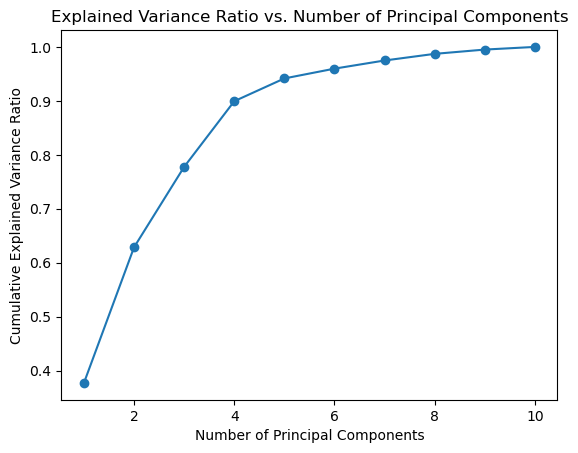

In [30]:
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

In [31]:
#Print dataset shape before and after PCA
print(f'\nTraining Data shape: {X_train.shape}')
print(f'PCA Training Data shape: {X_train_pca.shape}')


Training Data shape: (14772, 11)
PCA Training Data shape: (14772, 10)


In [32]:
d = np.argmax(cumulative_var_ratio >= 0.95) + 1
d

6

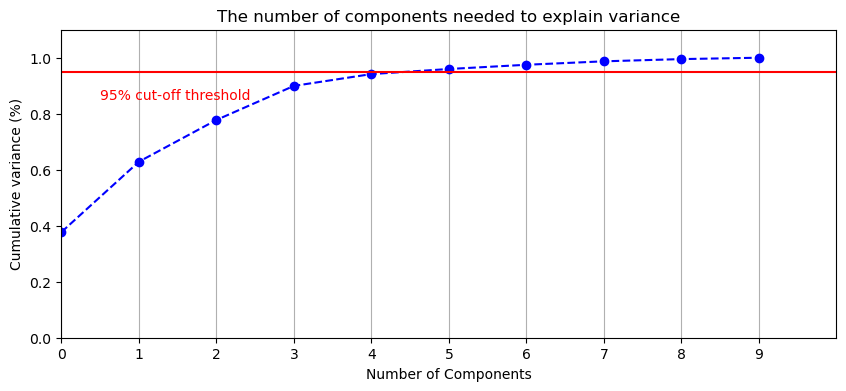

In [34]:
plt.rcParams["figure.figsize"] = (10,4)
fig, ax = plt.subplots()
xi = np.arange(0,10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.xlim([0,10])
plt.ylim([0.0,1.1])
plt.plot(xi, y, marker='o', linestyle='--', color='b')


plt.xlabel('Number of Components')
plt.xticks(np.arange(0,10, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=10)

ax.grid(axis='x')
plt.show()

In [35]:
pca = PCA(n_components = 6, svd_solver = 'full')

X_train_pca_6 = pca.fit_transform(X_train)
X_test_pca_6 = pca.transform(X_test)


In [36]:
print(pca.components_)

[[-3.61778391e-01 -3.38369866e-01  4.51569378e-01 -1.77126326e-01
   4.96939306e-01  4.18413802e-01 -1.24063367e-01  2.35693347e-01
  -5.11995608e-02 -3.42324113e-02 -1.50261375e-01]
 [-1.62573966e-01  6.98539654e-01  3.53914136e-01  4.49498676e-01
   2.20612234e-01  1.69030327e-01  1.78128216e-01 -1.60511838e-01
  -7.38533169e-03  1.53053509e-02  1.52591819e-01]
 [-3.29626953e-01  2.98494821e-01  2.85023040e-01 -6.97675877e-01
  -2.57328897e-01 -2.60838223e-01  3.15504826e-01  1.39799500e-02
   1.47564894e-03  7.00179657e-04 -1.61557786e-02]
 [ 1.65111754e-01 -2.63244559e-01 -7.53441771e-02  1.07850312e-01
   1.06558189e-01  1.34670039e-01  9.20119383e-01  8.20988846e-02
  -1.97557125e-02 -9.40257531e-03 -5.29405967e-02]
 [ 1.43147624e-01  3.46012782e-01 -5.56860207e-01 -4.37957853e-01
   4.84413002e-01  2.75072184e-01 -1.18798913e-02  8.92497782e-03
  -1.35216504e-01 -3.95280255e-02  1.65819552e-01]
 [-9.90391435e-02 -2.46357985e-01  2.31771115e-02 -1.33495943e-01
   1.09713471e-01  

In [37]:
#Print dataset shape before and after PCA
print(f'\nTraining Data shape: {X_train.shape}')
print(f'PCA Training Data shape: {X_train_pca_6.shape}')


Training Data shape: (14772, 11)
PCA Training Data shape: (14772, 6)


In [38]:
# number of components
n_pcs= pca.components_.shape[0]
n_pcs

6

In [39]:
n_= pca.components_.shape

In [40]:
n_

(6, 11)

In [41]:
# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE

most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

In [42]:
initial_feature_names = list(X_features.columns.values)
initial_feature_names

['T2',
 'rh2',
 'slp',
 'PBLH',
 'wind_speed_10m',
 'wind_speed_925hPa',
 'RAIN_CAT',
 'NE',
 'NW',
 'SE',
 'SW']

In [43]:
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [44]:
# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

In [45]:
# build the dataframe
df = pd.DataFrame(sorted(dic.items()))

In [46]:
df

,0,1
0,PC1,wind_speed_10m
1,PC2,rh2
2,PC3,PBLH
3,PC4,RAIN_CAT
4,PC5,slp
5,PC6,NE
